# Homework 1

## Luyao Wang
Netid: lw337

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline 

## 1) Invert a region of interest
**(2 points)**

**a)** Load the astronaut.png image into Fiji and determine the coordinates of a box containing the space shuttle (in the upper right background of the image) by selecting it with the rectangle tool. Observe that Fiji assigns the first coordinate to columns and the second one to rows; numpy does the reverse. Write down the coordinates as variables. (*0.5 points*) 

**b)** Load astronaut.png as a B&W image into a notebook cell and cut out an ROI (region of interest) only containing the space shuttle. Invert the image of the space shuttle (i.e. map the grayvalues interval [0, 1]  to the intervall [1, 0]), then display the original and the inverted ROI next to each other. (*1 point*) 
 
 
**c)** Copy the inverted space shuttle back into the B&W image and display the modified image. (*0.5 points*)  

**ANSWER**

a)
Measurements from Fiji:
* BX: 352
* BY: 0
* Width: 110
* Height: 275

BX stands for **B**ounding rectangle **X** of the upper left corner of the rectangle.
<https://imagej.net/ij/docs/menus/analyze.html>

b)

In [2]:
def load_image_as_grayscale(image_path: str):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    array = np.array(image)

    return array

In [3]:
png_file = "astronaut.png"
png_img_bw = load_image_as_grayscale(png_file)

bx = 352
by = 0
width = 110
height = 275

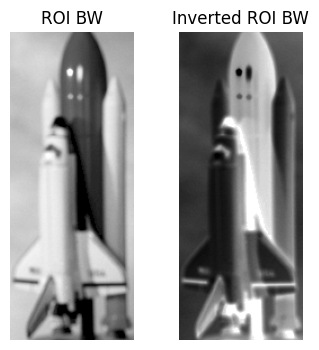

In [4]:
roi_bw = png_img_bw[by : by + height, bx : bx + width]
inverted_roi_bw = np.subtract(255, roi_bw)

fig, axes = plt.subplots(1, 2, figsize=(4, 4))

axes[0].imshow(roi_bw, cmap="grey", vmin=0, vmax=255)
axes[0].axis("off")
axes[0].title.set_text("ROI BW")
axes[1].imshow(inverted_roi_bw, cmap="grey", vmin=0, vmax=255)
axes[1].axis("off")
axes[1].title.set_text("Inverted ROI BW")

plt.show()

3)

Text(0.5, 1.0, 'Inverted ROI in full image')

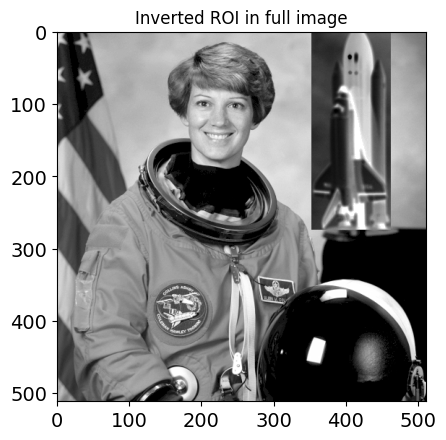

In [5]:
png_img_bw_copy = np.copy(png_img_bw)

png_img_bw_copy[by : by + height, bx : bx + width] = inverted_roi_bw

plt.imshow(png_img_bw_copy, cmap="grey", vmin=0, vmax=255)
plt.title("Inverted ROI in full image")

## 2) Visualize JPEG loss
**(2 points)**

Load astronaut.png and then save it twice as JPEG file (ending: .jpg) and as TIFF file (ending: .tif) (*0.5 point*). 
Load the JPEG and the TIFF file again from disk and convert all three images to B&W. (*0.5 point*) 

Compute the gray value difference between a) PNG and JPEG and b) PNG and TIFF. Display the *absolute values* of these difference images with colorbars. (*1 point*)  

**ANSWER**

In [6]:
def convert_png_to_jpg(png_path, jpg_path):
    image = cv2.imread(png_path)

    cv2.imwrite(jpg_path, image, [int(cv2.IMWRITE_JPEG_QUALITY), 70]) # lower JPEG quality for visualizing jpg loss


def convert_png_to_tiff(input_path, output_path):
    image = cv2.imread(input_path)

    cv2.imwrite(output_path, image)

In [7]:
png_file = "astronaut.png"
jpg_file = "astronaut.jpg"
tiff_file = "astronaut.tiff"

convert_png_to_jpg(png_file, jpg_file)
convert_png_to_tiff(png_file, tiff_file)

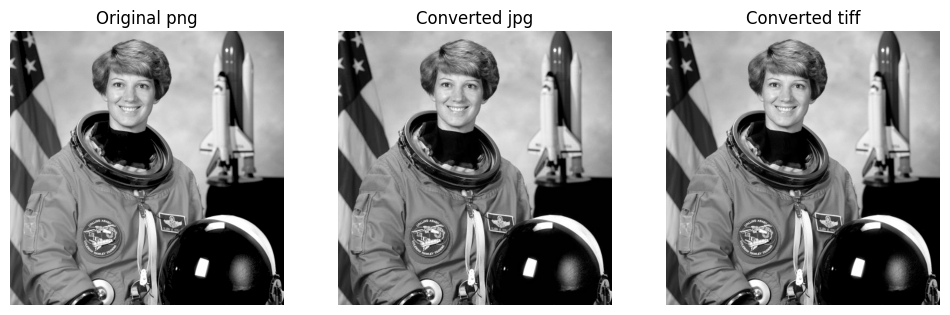

In [8]:
png_img_bw = load_image_as_grayscale(png_file)
jpg_img_bw = load_image_as_grayscale(jpg_file)
tiff_img_bw = load_image_as_grayscale(tiff_file)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(png_img_bw, cmap="grey", vmin=0, vmax=255)
axes[0].axis('off')
axes[0].title.set_text("Original png")
axes[1].imshow(jpg_img_bw, cmap="grey", vmin=0, vmax=255)
axes[1].axis("off")
axes[1].title.set_text("Converted jpg")
axes[2].imshow(tiff_img_bw, cmap="grey", vmin=0, vmax=255)
axes[2].axis("off")
axes[2].title.set_text("Converted tiff")

plt.show()

In [9]:
png_jpg_diff = np.abs(png_img_bw.astype("int32") - jpg_img_bw.astype("int32"))
png_tiff_diff = np.abs(png_img_bw.astype("int32") - tiff_img_bw.astype("int32"))

print(
    f"Average absolute diff in grayscale (0 to 255)\njpg: {np.average(png_jpg_diff)}\npng: {np.average(png_tiff_diff)}"
)

Average absolute diff in grayscale (0 to 255)
jpg: 6.3050079345703125
png: 5.03692626953125


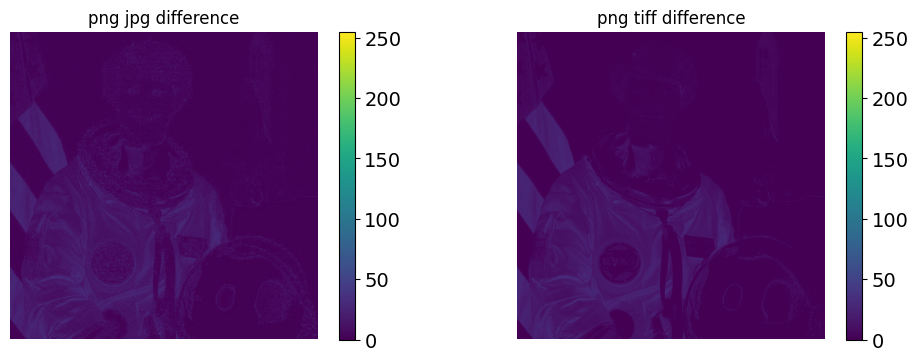

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

im_0 = axes[0].imshow(png_jpg_diff, vmin=0, vmax=255)
axes[0].axis("off")
axes[0].title.set_text("png jpg difference")
fig.colorbar(im_0)
im_1 = axes[1].imshow(png_tiff_diff, vmin=0, vmax=255)
axes[1].axis("off")
axes[1].title.set_text("png tiff difference")
fig.colorbar(im_1)

plt.show()

We can see clearly contours of the face of the astronaut in the jpeg file. 

The difference between png and diff is smaller than the difference between png and jpg.

## 3) The influence of saturation in HSV
**(2 points)**

Load flower.tif, convert it into the HSV colorspace. Create two new images where you set the saturation of all pixels to a) zero and b) one. Display the resulting images. (*1 point*) 

Explain your results in two sentences. (*1 point*)

**ANSWER**

In [11]:
auto_wb_bgr = cv2.imread("flower.tif")
hsv_image = cv2.cvtColor(auto_wb_bgr, cv2.COLOR_BGR2HSV)

image_saturation_zero = hsv_image.copy()
image_saturation_one = hsv_image.copy()

image_saturation_zero[:, :, 1] = 0
image_saturation_one[:, :, 1] = 255

result_zero = cv2.cvtColor(image_saturation_zero, cv2.COLOR_HSV2BGR)
result_one = cv2.cvtColor(image_saturation_one, cv2.COLOR_HSV2BGR)

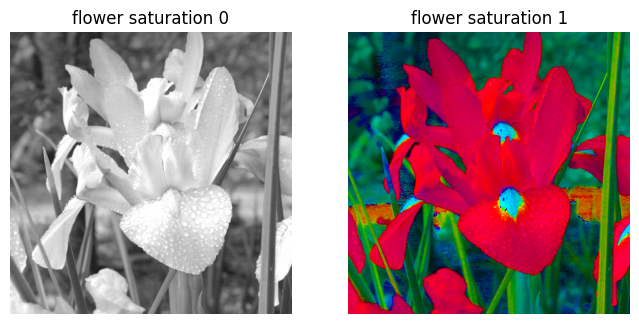

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(result_zero)
axes[0].axis("off")
axes[0].title.set_text("flower saturation 0")
axes[1].imshow(result_one)
axes[1].axis("off")
axes[1].title.set_text("flower saturation 1")

plt.show()

Image1: The brightness and hue of the original image are preserved, but the absence of saturation causes the image to lose its colorfulness.

Image2: The brightness and hue of the original image are preserved, but the saturation level is maximized, making the colors more vivid and saturated (over-saturated).

## 4) White balance
**(3 points)**

Find out how the white balance (sometimes also called color balance) in your camera is controlled. It will have several options such as daylight, incandescent, fluorescent ... and will most likely be set to auto. The purpose of this control is to compensate the influence of the spectral composition of the light illuminating the the scene you are about to photograph.

Take two images of the same scene (should be well iluminated and contain a variety of colors). One image should be taken using the daylight option and one image with any of the other options. Save them (JPEG is fine here) and load them into your notebook. Display the two images in the notebook. (*1 point*) 

If your camera does not have a manual choice for the white balance, install another camera app on your smartphone (on Android, Camera Zoom FX works nicely. Don't forget to switch your camera back to auto afterwards; even if not perfect it will normally make a good guess which option to use.

Separate both images in their RGB components. Create three figures where each one is comparing the histogram curves of one color channel in both images. (*1 point*) 

Both images were taken with light of roughly the same color distribution. Therefore, the differences in the histograms indicate what the camera assumes it needs to do in order to compensate for the differences in the spectra of the light sources. 

Describe qualitatively and in not more than three sentences *how* the camera thinks that the spectrum of daylight is differnt than the spectrum of your second choice light source.  

**ANSWER**

I adjusted my monitor light bar to the warmest light (around 2900K in its specification).

Auto mode of white balance detects a white balance of 2900K, and daylight mode of white balance is 5000k.

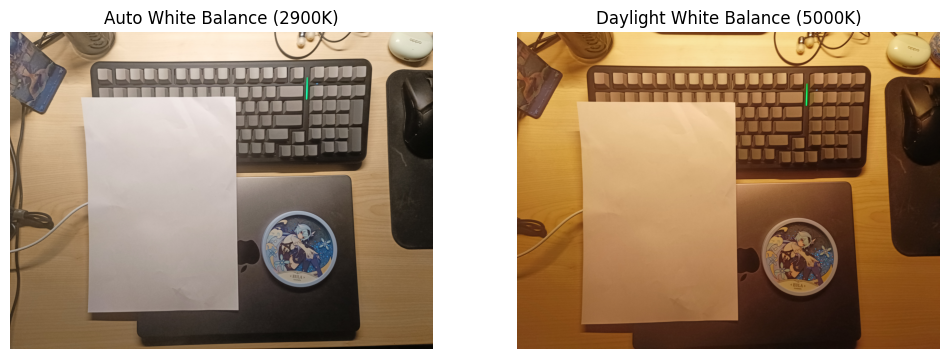

In [13]:
auto_wb_bgr = cv2.imread("auto_wb.jpg")
rgb_img_rgb = cv2.cvtColor(auto_wb_bgr, cv2.COLOR_BGR2RGB)
daylight_wb_bgr = cv2.imread("daylight_wb.jpg")
daylight_img_rgb = cv2.cvtColor(daylight_wb_bgr, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(rgb_img_rgb)
axes[0].axis("off")
axes[0].title.set_text("Auto White Balance (2900K)")
axes[1].imshow(daylight_img_rgb)
axes[1].axis("off")
axes[1].title.set_text("Daylight White Balance (5000K)")

plt.show()

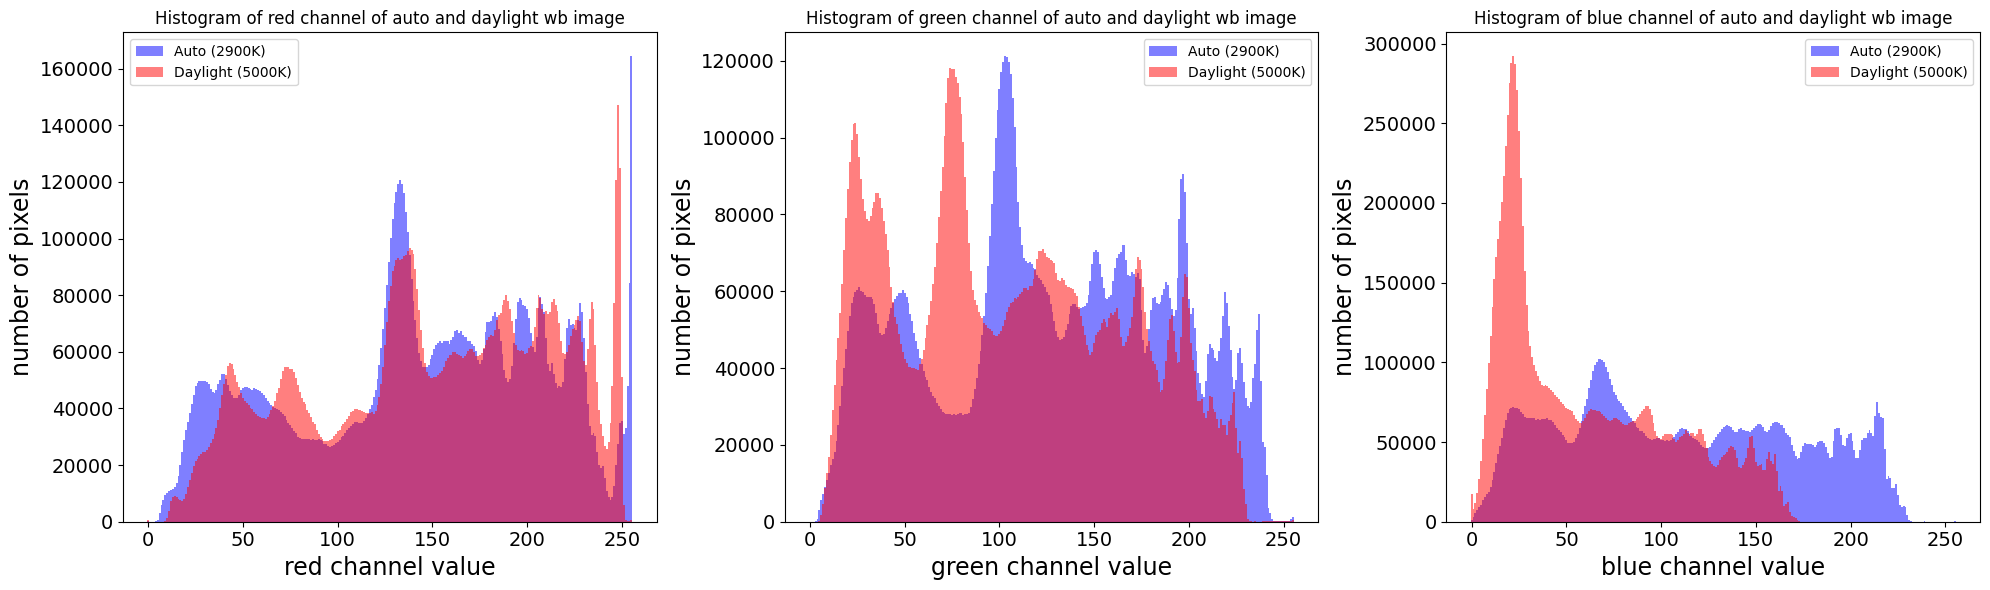

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].hist(
    rgb_img_rgb[:, :, 0].flatten(),
    bins=256,
    range=(0, 256),
    align="left",
    alpha=0.5,
    label="Auto (2900K)",
    color="blue",
)
axes[0].hist(
    daylight_img_rgb[:, :, 0].flatten(),
    bins=256,
    range=(0, 256),
    align="left",
    alpha=0.5,
    label="Daylight (5000K)",
    color="red",
)
axes[0].legend()
axes[0].title.set_text("Histogram of red channel of auto and daylight wb image")
axes[0].set_ylabel("number of pixels")
axes[0].set_xlabel("red channel value")

axes[1].hist(
    rgb_img_rgb[:, :, 1].flatten(),
    bins=256,
    range=(0, 256),
    align="left",
    alpha=0.5,
    label="Auto (2900K)",
    color="blue",
)
axes[1].hist(
    daylight_img_rgb[:, :, 1].flatten(),
    bins=256,
    range=(0, 256),
    align="left",
    alpha=0.5,
    label="Daylight (5000K)",
    color="red",
)
axes[1].legend()
axes[1].title.set_text("Histogram of green channel of auto and daylight wb image")
axes[1].set_ylabel("number of pixels")
axes[1].set_xlabel("green channel value")

axes[2].hist(
    rgb_img_rgb[:, :, 2].flatten(),
    bins=256,
    range=(0, 256),
    align="left",
    alpha=0.5,
    label="Auto (2900K)",
    color="blue",
)
axes[2].hist(
    daylight_img_rgb[:, :, 2].flatten(),
    bins=256,
    range=(0, 256),
    align="left",
    alpha=0.5,
    label="Daylight (5000K)",
    color="red",
)
axes[2].legend()
axes[2].title.set_text("Histogram of blue channel of auto and daylight wb image")
axes[2].set_ylabel("number of pixels")
axes[2].set_xlabel("blue channel value")

fig.tight_layout()
plt.show()

My light source emits a color temperature of approximately 2900K, which is warmer compared to daylight at 5000K. When using the daylight white balance mode on the camera, the image captured will appear warmer in order to offset the cooler color temperature of daylight. This adjustment is made by the camera to compensate for the disparity between the ambient color and the desired color temperature of the scene.